In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from masskit.utils.tablemap import ArrowLibraryMap
from masskit.test_fixtures.demo_fixtures import cho_uniq_short_parquet

# Use of the spectrum object
Masskit is a software library for doing computations associated with mass spectrometry and a good place to start our description of Masskit is to examine the usage of the [`Spectrum`](../masskit.spectrum.html#masskit.spectrum.spectrum.Spectrum) class that creates a spectrum object.  Let's begin by loading two spectra objects from a table in a file and then taking a look at a thumbnail of one of the spectra:

INFO:root:created chunk 1 with 100 records
INFO:root:processing batch 0 with size 100
INFO:root:created chunk 1 with 0 records


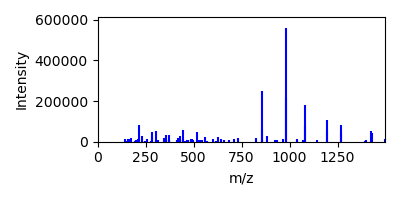

In [2]:
table = ArrowLibraryMap.from_parquet(cho_uniq_short_parquet())
spectrum1 = table[0]['spectrum']
spectrum2 = table[1]['spectrum']
spectrum1

The spectrum object contains the precursor and product ions for a spectrum, a dictionary of properties, and a variety of functions to operate on the ions.
## Accessing the spectrum ions 

In [3]:
print('The precursor m/z of spectrum 1 is', spectrum1.precursor.mz)
print("The first five product ion m/z's of spectrum 1 are", spectrum1.products.mz[0:5])
print("The first five product ion intensities's of spectrum 1 are", spectrum1.products.mz[0:5])

The precursor m/z of spectrum 1 is 855.4538
The first five product ion m/z's of spectrum 1 are [143.0823 153.2575 159.0917 162.5977 169.0972]
The first five product ion intensities's of spectrum 1 are [143.0823 153.2575 159.0917 162.5977 169.0972]


You'll note that the product ion mz's and intensities are stored in arrays, where each peak in the spectrum corresponds to a position in spectrum1.products.mz with a corresponding intensity in the same position in `spectrum1.products.mz`.  The precursor m/z is stored in `spectrum1.precursor.mz`. We use arrays of numbers as modern processors work quickly on arrays of the same type.  Behind the scenes, we use numpy or arrow arrays to speed computations.

## Spectrum properties
Each spectrum has properties associated with it, such as a name or collision energy. These are accessed as attributes of the spectrum object:

In [4]:
print("The name of the spectrum is", spectrum1.name, "and the collision energy is", spectrum1.ev)

The name of the spectrum is AAAACALTPGPLADLAAR/2_1(4,C,CAM) and the collision energy is 46.0


## Spectrum mass tolerance information
The spectrum object supports mass tolerances measured in both ppm's and Daltons. Mass tolerance information is kept in objects of class [`MassInfo`](../masskit.spectrum.html#masskit.spectrum.spectrum.MassInfo), and is applied to ions by using the `tolerance` array of `Spectrum` that show the mz tolerance for each ion.  Optionally, the `tolerance` array values can be set individually for each ion to allow for nonstandard mass tolerances.  The arrya is also used to perform quick interval arithmetic when matching spectra.

In [5]:
print(spectrum1.products.mass_info.tolerance, spectrum1.products.mass_info.tolerance_type)
print("minimum mz values", spectrum1.products.tolerance[0:5])

20.0 ppm
minimum mz values [143.07943835 153.25443485 159.08851817 162.59444805 169.09381806]
maximum mz values [143.08516165 153.26056515 159.09488183 162.60095195 169.10058194]


## Operations on spectra
There are a variety of operations that can be applied to spectra, including normalization, noise filtering, merging, masking, shifting, plotting, and comparison.  These operations can be conveniently chained, and by default, create new spectrum objects.  A list of methods can be found in [`Spectrum`](../masskit.spectrum.html#masskit.spectrum.spectrum.Spectrum). For example, to normalize the intensity to 1.0 and noise filter a spectrum, one could do:

(<matplotlib.collections.LineCollection at 0x7f38ff086280>,
 <matplotlib.collections.LineCollection at 0x7f3970050400>)

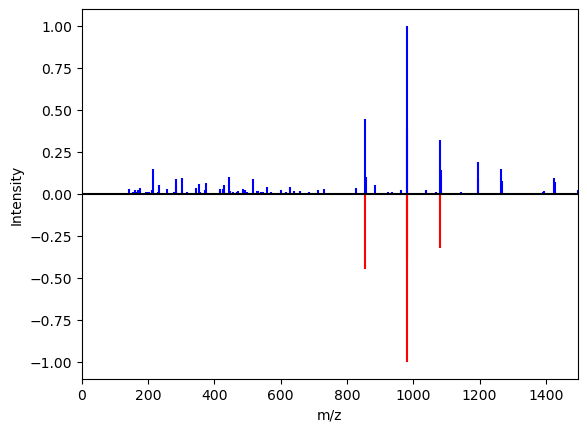

In [6]:
spectrum1b = spectrum1.norm(1.0).filter(min_intensity=0.2)
spectrum1.norm(1.0).plot(axes=plt.gca(), mirror_spectrum=spectrum1b)

## Operations on pairs of spectra

### Cosine score between two spectra

In [7]:
spectrum1.cosine_score(spectrum2)

586.6037181010105

### Cosine score between mz subranges

In [8]:
spectrum1.filter(min_mz=500, max_mz=1000).cosine_score(spectrum2.filter(min_mz=500, max_mz=1000))

599.529099567551

### Merge two spectra, first by creating a filter spectrum

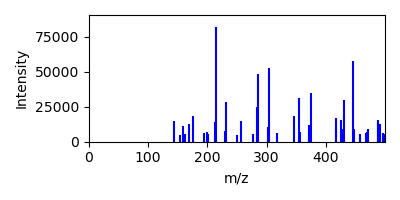

In [9]:
spectrum3 = spectrum1.filter(max_mz=500)
spectrum3

#### Then merge with previous spectrum

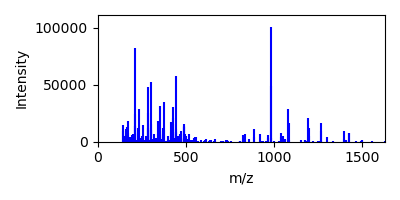

In [10]:
spectrum3.merge(spectrum2)